In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
m3_df = pd.read_excel (r'C:/Users/michelj8/Downloads/M3C.xls', sheet_name='M3Year')

In [3]:
def exp_smooth(Y,alpha):
    smooth = [0]
    for t in range(1, len(Y)):
        smooth.append( (1-alpha)*Y[t] + (alpha)* smooth[t-1])
        
    return smooth

In [4]:
def objective(Y,alpha,k_ahead):
    data = pd.DataFrame({'Y':Y, 'est':exp_smooth(Y,alpha)})
    data['est'] = data['est'].shift(k_ahead)
    data = data.dropna()
    
    sum_squares = np.square(data['Y'] - data['est']).sum()
    return sum_squares

In [5]:
def minimal_alpha(Y, k_ahead):
    obj_df = pd.DataFrame(columns = ['alpha','value'])
    
    obj_df['alpha'] = np.linspace(0,1,50)
    obj_df['value'] = obj_df['alpha'].apply(lambda s: objective(Y,s,k_ahead))
    
    min_val = obj_df['value'].min()
    return obj_df.set_index('value').loc[min_val,'alpha']

In [43]:
which_series_no = 469

single_series_df = pd.DataFrame(m3_df.set_index(['Series','N','NF','Category','Starting Year','Unnamed: 5']).iloc[which_series_no].values).dropna()

single_series_df.columns = ['values']

single_series_df['growth'] = single_series_df['values'].pct_change(1)
single_series_df['delta'] = single_series_df['values'].diff(1)

single_series_df= single_series_df.dropna()

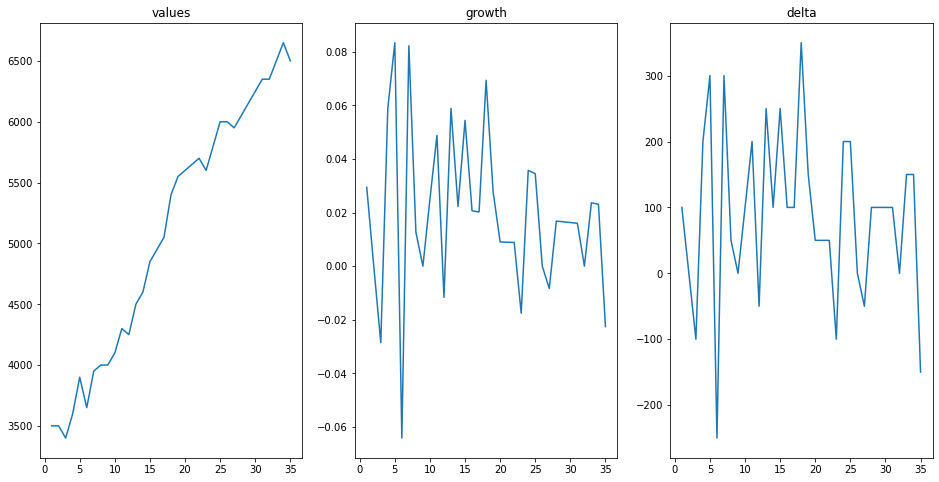

In [44]:
fig, ax = plt.subplots( 1,3,figsize =(16,8))
ax_index = 0 

for transform in single_series_df.columns:
    single_series_df[transform].plot(ax = ax[ax_index])
    ax[ax_index].set_title(transform)
    ax_index = ax_index+1

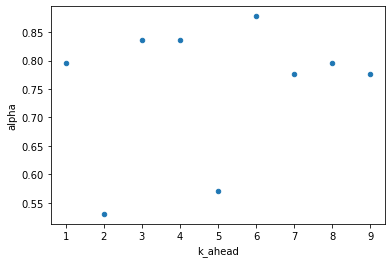

In [47]:
# Y = single_series_df['values']
Y = single_series_df['growth']
# Y = single_series_df['delta']

opt_smoother = pd.DataFrame(columns = ['k_ahead','alpha'])
opt_smoother['k_ahead'] = range(1,10)

opt_smoother['alpha'] = opt_smoother['k_ahead'].apply(lambda s: minimal_alpha(Y,s) )

opt_smoother.plot.scatter(x='k_ahead', y='alpha')

In [46]:
m3_df.iloc[which_series_no]

Series                  N 470
N                          36
NF                          6
Category         DEMOGRAPHIC 
Starting Year            1959
Unnamed: 5                  1
1                        3400
2                        3500
3                        3500
4                        3400
5                        3600
6                        3900
7                        3650
8                        3950
9                        4000
10                       4000
11                       4100
12                       4300
13                       4250
14                       4500
15                       4600
16                       4850
17                       4950
18                       5050
19                       5400
20                       5550
21                       5600
22                       5650
23                       5700
24                       5600
25                       5800
26                       6000
27                       6000
28        